Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.ensemble import HistGradientBoostingRegressor

Data Collection and Processing

In [4]:
# loading the csv data to a Panda Dataframe
SLV_data = pd.read_csv('/content/gold_dataset.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/gold_dataset.csv'

In [ ]:
print(SLV_data.head(10))

        Date          SPX        GLD        USO        SLV   EUR/USD
0   1/2/2008  1447.160034  84.860001  78.470001  15.180000  1.471692
1   1/3/2008  1447.160034  85.570000  78.370003  15.285000  1.474491
2   1/4/2008  1411.630005  85.129997  77.309998  15.167000  1.475492
3   1/7/2008  1416.180054  84.769997  75.500000  15.053000  1.468299
4   1/8/2008  1390.189941  86.779999  76.059998  15.590000  1.557099
5   1/9/2008  1409.130005  86.550003  75.250000  15.520000  1.466405
6  1/10/2008  1420.329956  88.250000  74.019997  16.061001  1.480100
7  1/11/2008  1401.020020  88.580002  73.089996  16.077000  1.479006
8  1/14/2008  1416.250000  89.540001  74.250000  16.280001  1.486900
9  1/15/2008  1380.949951  87.989998  72.779999  15.834000  1.480210


In [ ]:
# print last 10 rows of the dataframe
print(SLV_data.tail(10))

           Date          SPX         GLD      USO      SLV   EUR/USD
2280  4/30/2018  2648.050049  124.589996  13.8000  15.3800  1.208123
2281   5/1/2018  2654.800049  123.709999  13.6100  15.2400  1.199156
2282   5/2/2018  2635.669922  123.650002  13.6700  15.4200  1.195100
2283   5/3/2018  2629.729980  124.279999  13.8200  15.4600  1.198926
2284   5/7/2018  2672.629883  124.570000  14.1000  15.5200  1.193374
2285   5/8/2018  2671.919922  124.589996  14.0600  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.3700  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.4100  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.3800  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.4058  15.4542  1.182033


In [ ]:
# numbers of rows and column
print(SLV_data.shape)

(2290, 6)


In [ ]:
# Getting some basic info about data
print(SLV_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB
None


In [ ]:
# checking the number of missing values
print(SLV_data.isnull().sum())

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64


In [ ]:
# getting the statistical measures of the data
print(SLV_data.describe())

               SPX          GLD          USO          SLV      EUR/USD
count  2290.000000  2290.000000  2290.000000  2290.000000  2290.000000
mean   1654.315776   122.732875    31.842221    20.084997     1.283653
std     519.111540    23.283346    19.523517     7.092566     0.131547
min     676.530029    70.000000     7.960000     8.850000     1.039047
25%    1239.874969   109.725000    14.380000    15.570000     1.171313
50%    1551.434998   120.580002    33.869999    17.268500     1.303297
75%    2073.010070   132.840004    37.827501    22.882500     1.369971
max    2872.870117   184.589996   117.480003    47.259998     1.598798


  Correlation
  1. Positive Correlation
  2. Negative Correlation


In [ ]:
correlation = SLV_data.select_dtypes(include='number').corr()

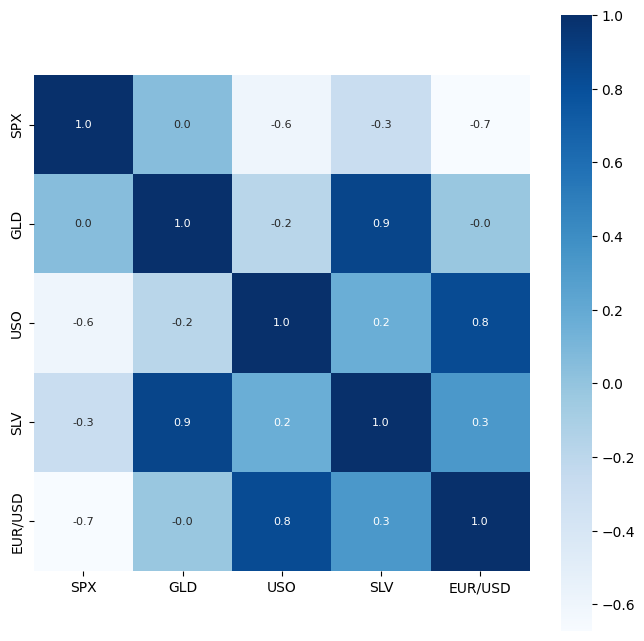

In [ ]:
if not correlation.empty:
    plt.figure(figsize=(8, 8))
    sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')
    plt.show()
else:
    print("Correlation matrix is empty. Cannot generate heatmap.")


In [ ]:
# correlation values of Silver
print(correlation['SLV'])

SPX       -0.274055
GLD        0.866632
USO        0.167547
SLV        1.000000
EUR/USD    0.321631
Name: SLV, dtype: float64


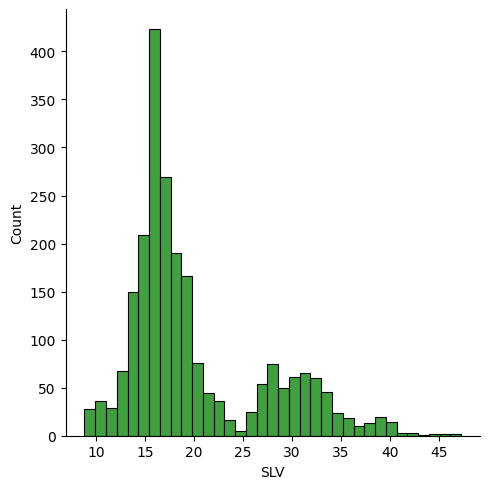

In [ ]:
#check the distribution of Silver price
sns.displot(SLV_data['SLV'], color='green')

Splitting the features and target

In [ ]:
X = SLV_data.drop(['Date', 'SLV'], axis=1)
Y = SLV_data['SLV']

In [ ]:
print(X)

              SPX         GLD        USO   EUR/USD
0     1447.160034   84.860001  78.470001  1.471692
1     1447.160034   85.570000  78.370003  1.474491
2     1411.630005   85.129997  77.309998  1.475492
3     1416.180054   84.769997  75.500000  1.468299
4     1390.189941   86.779999  76.059998  1.557099
...           ...         ...        ...       ...
2285  2671.919922  124.589996  14.060000  1.186789
2286  2697.790039  124.330002  14.370000  1.184722
2287  2723.070068  125.180000  14.410000  1.191753
2288  2730.129883  124.489998  14.380000  1.193118
2289  2725.780029  122.543800  14.405800  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0       15.1800
1       15.2850
2       15.1670
3       15.0530
4       15.5900
         ...   
2285    15.5100
2286    15.5300
2287    15.7400
2288    15.5600
2289    15.4542
Name: SLV, Length: 2290, dtype: float64


Splitting into Training data and test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
# training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[32.64509986 13.76927996 14.58959999 18.39420004 17.24249993 26.44970008
 35.24719994 16.70989965 16.86810021 19.9316998  15.7691     35.93639949
 23.05040014 32.77039904 15.93579986 16.64769994 28.96429928 32.55359995
 30.18969941 34.15520119 27.55879996 20.33639962 41.2538007  38.90099955
 16.12669974 14.4744     11.3985     18.82790006 16.5506997  31.83740011
 12.1796     16.10350017 17.30163027 14.4228     18.18340002 28.20630022
 16.10709986 15.3775     27.95140014 14.1827     15.4579     16.94157007
 15.58689999 17.62160017 29.23159968 19.20579962 13.916      14.0976
 18.23044    20.2210998   9.2864     15.47269999 16.61989997 14.937
 15.71149999 18.66310012 29.83239972 37.63119945 44.93170123 16.29539967
 18.08977973 16.32184973 13.217      15.00670002 15.84600002 20.96529966
 34.06870032 16.14180006 16.03879998 16.15078013 32.1579999  39.19849974
 23.48929986 18.6422997  18.76039983 19.2597998  15.83299996 15.88919986
 14.0161     18.88689999 16.20139979 16.85429959 18.60899959

In [ ]:
predictions = model.predict(X_test)

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9938768805941774


Model Training:Random Forest Regressor

In [ ]:
Y_test = list(Y_test)

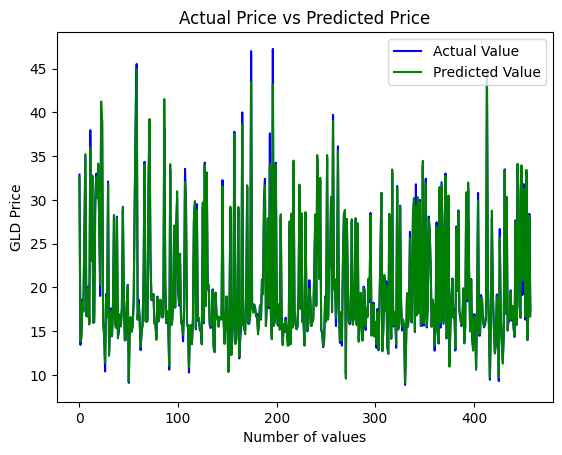

In [ ]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()